## Part 1 - Assignment 1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import time

1. Use library scripts to generate p-ER random graphs and r- regular random graph.
Let K denote the number of nodes.

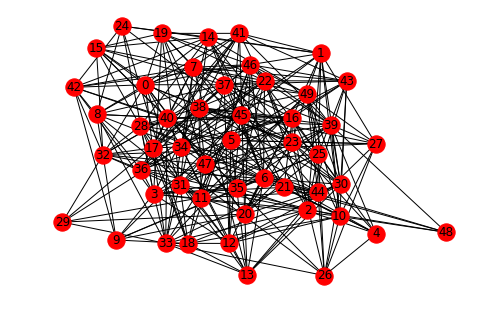

In [46]:
k=50
ERG=nx.erdos_renyi_graph(k,0.25) 
nx.draw(G, with_labels=True) 
plt.show()

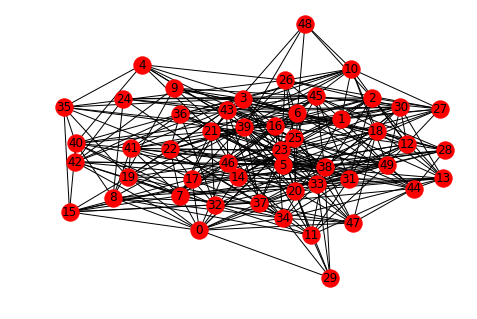

In [47]:
k=50
RG=nx.random_regular_graph(10,k,seed=None) 
nx.draw(G, with_labels=True) 
plt.show()

2.Write a Script to check the connectivity of a given graph.
*algebraic method 1(irreducibility)
*algebraic method 2(eigenvalue of the Laplacian matrix)
*breath-first search algorithm

In [2]:
def irreducibility(G):
    G = nx.to_numpy_matrix(G)
    A = G.copy()
    #number of nodes
    N = len(G)
    #identity matrix
    X = G**0
    #check if its reducible by finding A1 A2 A3 ...
    for i in range(1,N):
        X += A
        A = np.inner(A,G)
       
    if(np.min(X)>0):
        return True
    else:
        return False
    

In [75]:
irreducibility(ERG)

True

In [76]:
irreducibility(RG)

True

In [3]:
def laplace(G):
    L = nx.laplacian_matrix(G)
    EigenValues = np.sort(np.linalg.eigvals(L.todense()))
    if(EigenValues[1]>0):
        return True
    else:
        return False

In [89]:
laplace(ERG)

True

In [90]:
laplace(RG)

True

In [4]:
def BFS(G):
    Start = random.choice(list(G))
    Edges = nx.bfs_edges(G, Start)
    Visited = [Start]+[v for u,v in Edges]
    NotVisited = list(set(G)-set(Visited))
    
    if(len(NotVisited)== 0):
        return True
    else:
        return False

In [104]:
BFS(ERG)

True

In [105]:
BFS(RG)

True

3. Compare the complexity as a function K of the methods above by plotting curves of a complexity measure vs n

In [5]:
N_Vect = [50,75,100,125,150,175,200]

def complexityRegular(N_Vect):
    RD = {}
    for N in N_Vect:
        RD[N] = []
        R_G = nx.random_regular_graph(10,N,seed=None) 

        Start = time.time()
        irreducibility(R_G)
        RD[N].append(time.time()- Start)

        Start = time.time()
        laplace(R_G)
        RD[N].append(time.time()- Start)

        Start = time.time()
        BFS(R_G)
        RD[N].append(time.time()- Start)
        
    return RD

def complexityER(N_Vect):
    ERD = {}
    for N in N_Vect:
        ERD[N] = []
        ER_G = nx.erdos_renyi_graph(N,0.25) 

        Start = time.time()
        irreducibility(ER_G)
        ERD[N].append(time.time()- Start)

        Start = time.time()
        laplace(ER_G)
        ERD[N].append(time.time()- Start)

        Start = time.time()
        BFS(ER_G)
        ERD[N].append(time.time()- Start)
        
    return ERD

In [6]:
RD = complexityRegular(N_Vect)
ERD = complexityER(N_Vect)

C:\Users\Mohanraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in add
  # Remove the CWD from sys.path while we load stuff.


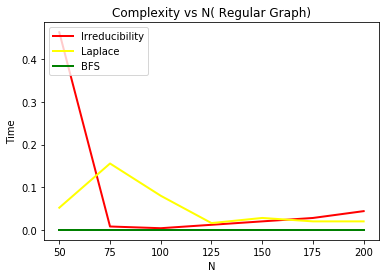

In [10]:
X,Y = zip(*sorted(RD.items(),key = lambda X: X[0]))

colors = ['r','Yellow','g']

plt.figure()
for i in range(3):
    l = []
    x = list(X)
    for k in range(len(Y)):
        l.append(Y[k][i])
    for j in range(len(X)):
        x[j] = x[j]+2
    
    plt.plot(list(X),l,color=colors[i],lw=2)
    
plt.legend(['Irreducibility', 'Laplace', 'BFS'], loc = 2)
plt.title('Complexity vs N( Regular Graph)')
plt.xlabel('N')
plt.ylabel('Time')
plt.xticks(X, N_Vect)
plt.show()

Above is the complexity of the algorithm written for ER Random Graph.  By Observing above graph we can see that BFS is taking less complexity than other two algorithms

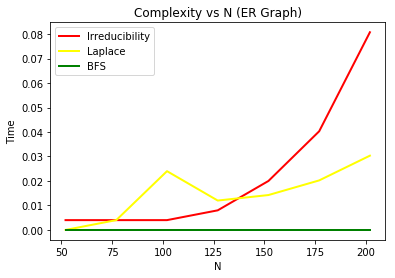

In [11]:
X,Y = zip(*sorted(ERD.items(),key = lambda X: X[0]))

colors = ['r','Yellow','g']

plt.figure()
for i in range(3):
    l = []
    x = list(X)
    for k in range(len(Y)):
        l.append(Y[k][i])
    for j in range(len(X)):
        x[j] = x[j]+2
    
    plt.plot(list(x),l,color=colors[i],lw=2)
    
plt.legend(['Irreducibility', 'Laplace', 'BFS'], loc = 2)
plt.title('Complexity vs N (ER Graph)')
plt.xlabel('N')
plt.ylabel('Time')
plt.xticks(X, N_Vect)
plt.show()

The Above graph suggest that the BFS is the best practice as it is less complex than Irreducibility and Laplace method of finding connectivity of a Regular Random Graph.

In [139]:
RD

{50: [0.0, 0.0, 0.0],
 75: [0.0, 0.0, 0.0],
 100: [0.015622615814208984, 0.0, 0.0],
 125: [0.015619039535522461, 0.0, 0.0],
 150: [0.024158477783203125, 0.015627622604370117, 0.0],
 175: [0.03124070167541504, 0.015622854232788086, 0.0],
 200: [0.05337023735046387, 0.031243085861206055, 0.0]}

In [140]:
ERD

{50: [0.0, 0.0, 0.0],
 75: [0.006525993347167969, 0.002014636993408203, 0.0],
 100: [0.0, 0.010037660598754883, 0.0],
 125: [0.010025262832641602, 0.00803828239440918, 0.002050161361694336],
 150: [0.020181894302368164, 0.010102033615112305, 0.0],
 175: [0.030284404754638672, 0.01006317138671875, 0.0],
 200: [0.05037212371826172, 0.02016592025756836, 0.0]}

Above are the Time complexity based on N for both Regular Random Graph and also ER random graph

As we can see BFS is the Best Practice for both the Regular Random Graph as well as ER Random Graph.  For below Monte Carlo Simulations we will be using Breadth First Search Algorithm

4. Let Pc(G) denote probability that graph G is connected by running Monte Carlo Simulations estimate Pc(G) and produce two curve plots:
    Pc(G) vs p for ER Graphs with K = 100
    Pc(G) vs K, K<=100, for r-regular random random graphs with r = 2 and r=8

In [150]:
P_Vector = np.linspace(0,1,num=50,endpoint =False)
def ERGraph(P_Vector):
    K =100
    PCG = [0]*len(P_Vector)
    for i in range(len(P_Vector)):
        total = 0
        for j in range(1000):
            ER_G = nx.erdos_renyi_graph(K,P_Vector[i]) 
            if BFS(ER_G) == True:
                total+=1
        PCG[i] = total/1000
    return PCG

Text(0, 0.5, 'Pc(G)')

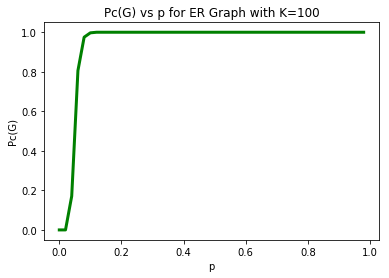

In [151]:
PCG = ERGraph(P_Vector)
plt.plot(P_Vector,PCG,color='g',lw=3)
plt.title("Pc(G) vs p for ER Graph with K=100")
plt.xlabel("p")
plt.ylabel("Pc(G)")

The graph is shown for ER Graph with K=100 where based on the value of p the Probability of connectivity of graph varies as we can see in Graph.
its showing beyond 0.1 p value the probability of connectivity of a graph is 100%

In [12]:
def RGraph(r):
    PCG = [0]*100
    for K in range(1,101):
        total = 0
        if K>r:
            for j in range(1000):
                R_G = nx.random_regular_graph(r,K,seed=None) 
                if BFS(R_G) == True:
                    total+=1
            PCG[K-1] = total/1000
    return PCG

Text(0, 0.5, 'Pc(G)')

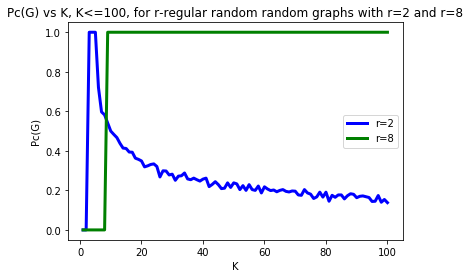

In [13]:
PCG1 = RGraph(2)
PCG2 = RGraph(8)
plt.plot(range(1,101),PCG1,color='b',lw=3)
plt.plot(range(1,101),PCG2,color='g',lw=3)
plt.title("Pc(G) vs K, K<=100, for r-regular random random graphs with r=2 and r=8")
plt.legend(['r=2','r=8'])
plt.xlabel("K")
plt.ylabel("Pc(G)")

The above graph suggest that the R regular random graph with degree 2 is strongly connected only when K is around 2 as well.  As we can see as the number of nodes increase and the degree is 2 the connectivity of the graph is less

The R regular random graph is strongly connected when r=8 and for all the values of K >8.